In [ ]:
'''RUN TO DOWNLOAD DATA CSV'''

# Install Kaggle API if needed
!pip install kaggle

# Create kaggle directory
!mkdir -p ~/.kaggle

# Upload your kaggle.json manually in Jupyter first,
# then move it:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d murderaccountability/homicide-reports

# Unzip
!unzip homicide-reports.zip



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
cp: kaggle.json: No such file or directory
chmod: /Users/ashley/.kaggle/kaggle.json: No such file or directory
Dataset URL: https://www.kaggle.com/datasets/murderaccountability/homicide-reports
License(s): CC-BY-SA-4.0
homicide-reports.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  homicide-reports.zip
  inflating: database.csv            


In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("database.csv")

'''CLEAN DATA'''
# Relevant columns
df = df[['Victim Sex', 'Victim Race', 'Perpetrator Sex',
         'Perpetrator Race', 'Weapon', 'State', 'Crime Solved']]

df = df.dropna()

df['Crime Solved'] = df['Crime Solved'].map({'Yes':1, 'No':0})

df = pd.get_dummies(df, drop_first=True)

df.head()


/var/folders/sq/5kx0kjfd6dl7zrblvrd1nb5w0000gn/T/ipykernel_46421/975111911.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("database.csv")


,Crime Solved,Victim Sex_Male,Victim Sex_Unknown,Victim Race_Black,Victim Race_Native American/Alaska Native,Victim Race_Unknown,Victim Race_White,Perpetrator Sex_Male,Perpetrator Sex_Unknown,Perpetrator Race_Black,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,1,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target
X = df.drop('Crime Solved', axis=1)
y = df['Crime Solved']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/Users/ashley/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/ashley/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ashley/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ashley/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

Accuracy: 0.9996945751854085
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37875
           1       1.00      1.00      1.00     89816

    accuracy                           1.00    127691
   macro avg       1.00      1.00      1.00    127691
weighted avg       1.00      1.00      1.00    127691



In [ ]:
# Sample case from dataset
sample = X_test.iloc[[0]]
prediction = model.predict(sample)

print("Predicted Solved:", "Yes" if prediction[0]==1 else "No")


Predicted Solved: No


/Users/ashley/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


/var/folders/sq/5kx0kjfd6dl7zrblvrd1nb5w0000gn/T/ipykernel_46421/1775844718.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("database.csv")


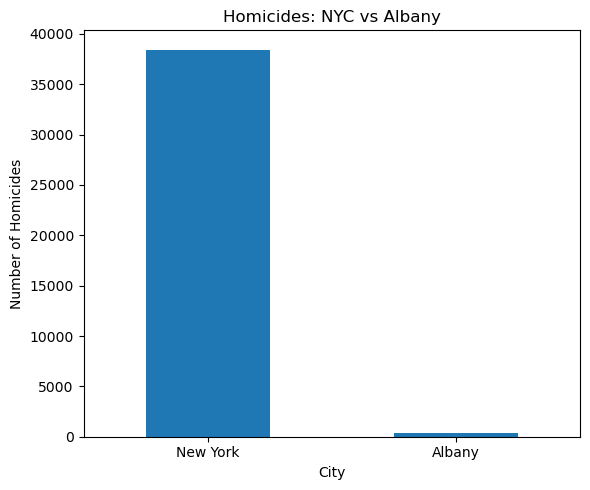

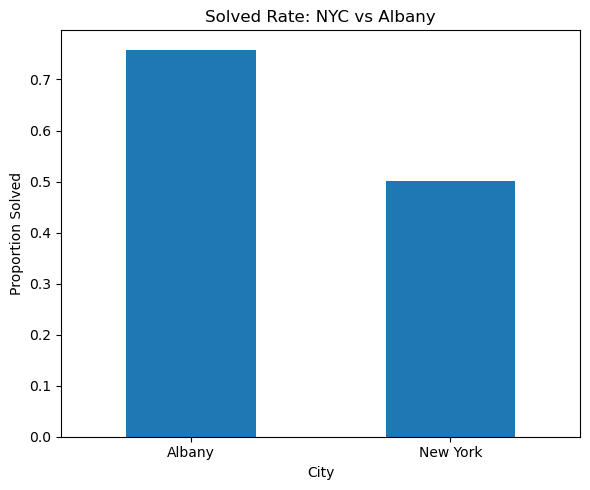

In [18]:
import matplotlib.pyplot as plt

df = pd.read_csv("database.csv")

# Filter for New York state AND either NYC or Albany
ny = df[
    (df['State'] == 'New York') &
    ((df['City'] == 'New York') | (df['City'] == 'Albany'))
]

# Count homicides by city
city_counts = ny['City'].value_counts()

plt.figure(figsize=(6,5))
city_counts.plot(kind='bar')

plt.title("Homicides: NYC vs Albany")
plt.xlabel("City")
plt.ylabel("Number of Homicides")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Solved rates
solved_rates = ny.groupby('City')['Crime Solved'].apply(
    lambda x: (x == 'Yes').mean()
)

plt.figure(figsize=(6,5))
solved_rates.plot(kind='bar')

plt.title("Solved Rate: NYC vs Albany")
plt.ylabel("Proportion Solved")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

